C:\Users\mande\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.
C:\Users\mande\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


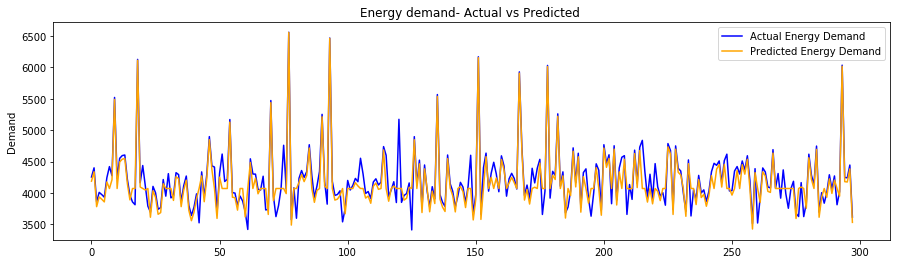

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
energyData=pd.read_csv('PRICE_AND_DEMAND_201903_VIC1.csv')
df = energyData[['SETTLEMENTDATE', 'TOTALDEMAND']]
df['SETTLEMENTDATE'] =  pd.to_datetime(df['SETTLEMENTDATE'], dayfirst=True)

from sklearn import preprocessing
minmaxscaler=preprocessing.MinMaxScaler()
array_y=np.array(df['TOTALDEMAND'])
normalized_y=minmaxscaler.fit_transform(array_y.reshape(-1,1))
  
X = np.array(df['SETTLEMENTDATE'])
X=X.astype(float)
  
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, normalized_y, test_size = 0.2, random_state=0)

#Training and test based on date
month = df['SETTLEMENTDATE'][1].month
year = df['SETTLEMENTDATE'][1].year
import datetime
date=datetime.datetime(year,month,22)
X_train_df = df[(df['SETTLEMENTDATE'] <= date)].SETTLEMENTDATE
X_test_df = df[(df['SETTLEMENTDATE'] >= date)].SETTLEMENTDATE
Y_train_df = df[(df['SETTLEMENTDATE'] <= date)].TOTALDEMAND
Y_test_df = df[(df['SETTLEMENTDATE'] >= date)].TOTALDEMAND

from sklearn import preprocessing
minmaxscaler=preprocessing.MinMaxScaler()
X_train = np.array(X_train_df)
X_test = np.array(X_test_df)
Y_train = np.array(Y_train_df)
Y_test = np.array(Y_test_df)
Y_train=minmaxscaler.fit_transform(Y_train.reshape(-1,1))
Y_test=minmaxscaler.fit_transform(Y_test.reshape(-1,1))


#Fitting model on data before 22nd and predicting on xTest generated in random splot
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=25, random_state=0,max_leaf_nodes=None)
regressor.fit(X_train.reshape(-1,1), Y_train.reshape(-1,1))
y_predict=regressor.predict(xTest.reshape(-1,1))

plt.figure(figsize=(15,4))
plt.plot(minmaxscaler.inverse_transform(yTest.reshape(-1,1)), color='blue', label = 'Actual Energy Demand')
plt.plot(minmaxscaler.inverse_transform(y_predict.reshape(-1,1)), color='orange', label = 'Predicted Energy Demand')
plt.title('Energy demand- Actual vs Predicted ')
plt.ylabel('Demand')
plt.legend()